In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Load the processed dataset
df = pd.read_csv('../data/intern_data_ikarus_processed.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"Total Products: {len(df)}")
print(f"Total Features: {df.shape[1]}")
print("\n" + "="*60)
print("\nFirst 5 rows:")
df.head()


📊 Dataset Shape: (305, 15)
Total Products: 305
Total Features: 15


First 5 rows:


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id,price_numeric,images_list,combined_text
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded,24.99,"[""['https://m.media-amazon.com/images/I/416WaL...","GOYMFK 1pc Free Standing Shoe Rack, Multi-laye..."
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e,-1.00,"[""['https://m.media-amazon.com/images/I/31SejU...","subrtex Leather ding Room, Dining Chairs Set o..."
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8,5.98,"[""['https://m.media-amazon.com/images/I/41Rgef...",Plant Repotting Mat MUYETOL Waterproof Transpl...
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5,13.99,"[""['https://m.media-amazon.com/images/I/61vz1I...","Pickleball Doormat, Welcome Doormat Absorbent ..."
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a,89.99,"[""['https://m.media-amazon.com/images/I/41p4d4...",JOIN IRON Foldable TV Trays for Eating Set of ...


In [3]:
print("📋 Dataset Information:")
print("="*60)
df.info()

print("\n" + "="*60)
print("\n📊 Statistical Summary:")
print("="*60)
df.describe()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               305 non-null    object 
 1   brand               305 non-null    object 
 2   description         154 non-null    object 
 3   price               210 non-null    object 
 4   categories          305 non-null    object 
 5   images              305 non-null    object 
 6   manufacturer        200 non-null    object 
 7   package_dimensions  299 non-null    object 
 8   country_of_origin   122 non-null    object 
 9   material            212 non-null    object 
 10  color               259 non-null    object 
 11  uniq_id             305 non-null    object 
 12  price_numeric       305 non-null    float64
 13  images_list         305 non-null    object 
 14  combined_text       305 non-null    object 
dtypes: float64(1), object(14)
memory u

,price_numeric
count,305.000000
mean,46.710328
std,58.036023
min,-1.000000
25%,-1.000000
50%,25.020000
75%,67.900000
max,349.000000


🔍 Missing Values Analysis:
            Column  Missing Count  Percentage
 country_of_origin            183   60.000000
       description            151   49.508197
      manufacturer            105   34.426230
             price             95   31.147541
          material             93   30.491803
             color             46   15.081967
package_dimensions              6    1.967213


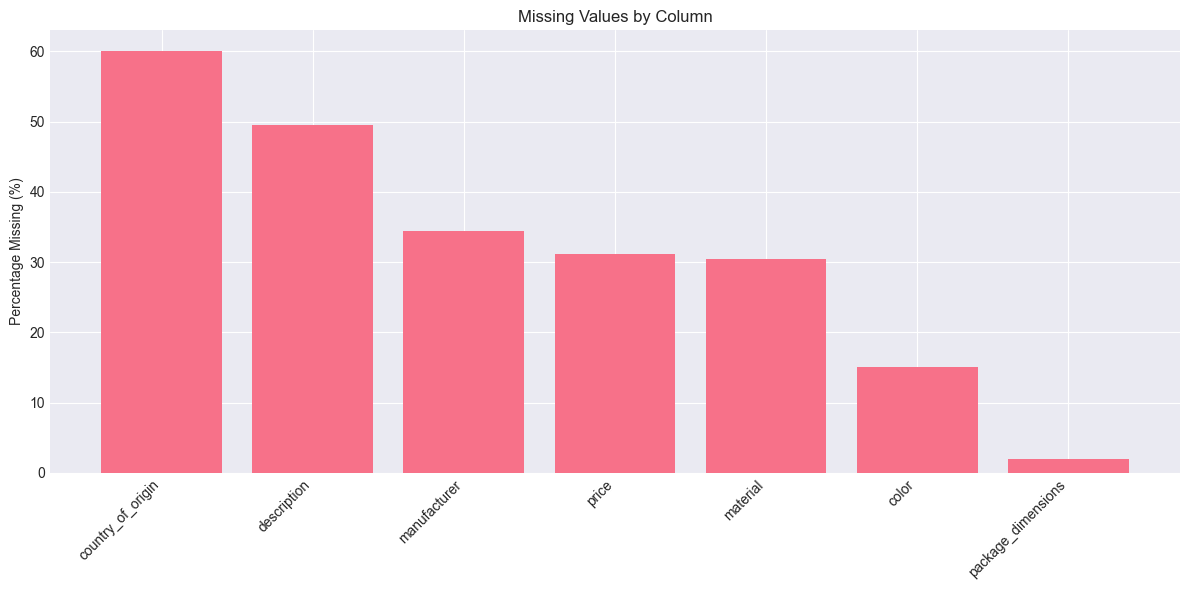

In [4]:
print("🔍 Missing Values Analysis:")
print("="*60)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    
    # Visualize
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Percentage'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage Missing (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values in dataset!")


💰 Price Analysis:
Total products with valid prices: 210
Average Price: $68.29
Median Price: $54.09
Min Price: $0.60
Max Price: $349.00
Std Dev: $58.28


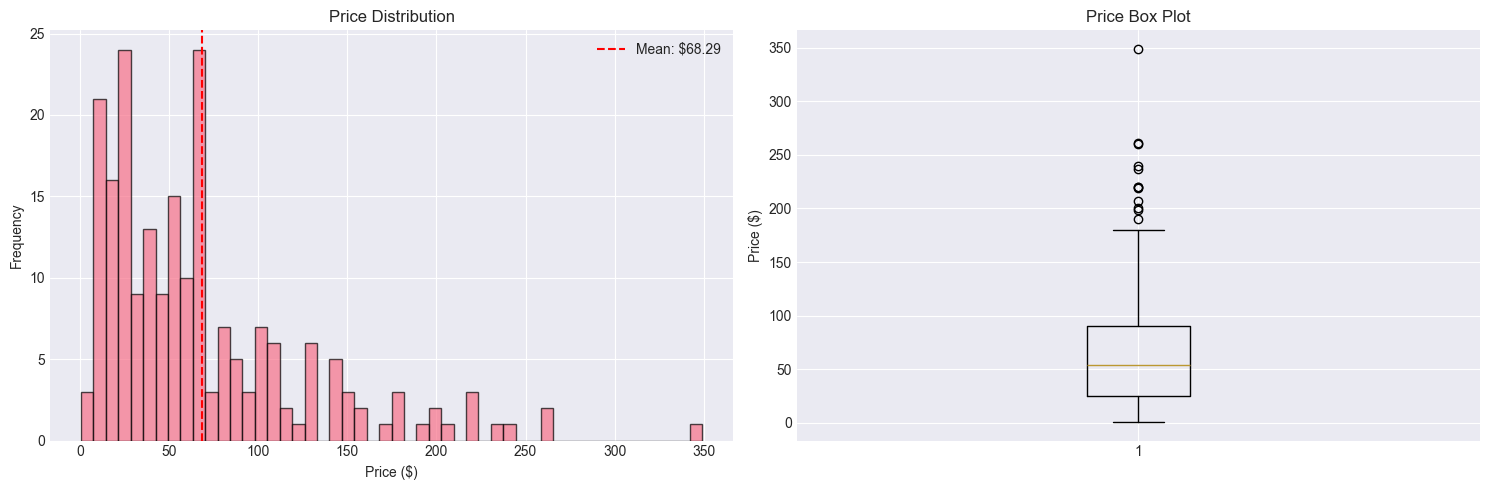

In [5]:
print("💰 Price Analysis:")
print("="*60)

# Filter valid prices
valid_prices = df[df['price_numeric'] > 0]['price_numeric']

print(f"Total products with valid prices: {len(valid_prices)}")
print(f"Average Price: ${valid_prices.mean():.2f}")
print(f"Median Price: ${valid_prices.median():.2f}")
print(f"Min Price: ${valid_prices.min():.2f}")
print(f"Max Price: ${valid_prices.max():.2f}")
print(f"Std Dev: ${valid_prices.std():.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(valid_prices, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].axvline(valid_prices.mean(), color='red', linestyle='--', label=f'Mean: ${valid_prices.mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(valid_prices)
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price Box Plot')

plt.tight_layout()
plt.show()


🏷️ Brand Analysis:
Total unique brands: 264

Top 15 Brands by Product Count:
brand
Flash Furniture Store         5
MoNiBloom Store               5
HomePop Store                 4
Caroline's Treasures Store    4
Kingston Brass Store          4
Convenience Concepts Store    3
huester                       2
Pfister Store                 2
Adeco Store                   2
Homebeez Store                2
Serta Store                   2
GXFC ZHAO Store               2
Toland Home Garden Store      2
FLYJOE                        2
BOKKOLIK Store                2
Name: count, dtype: int64


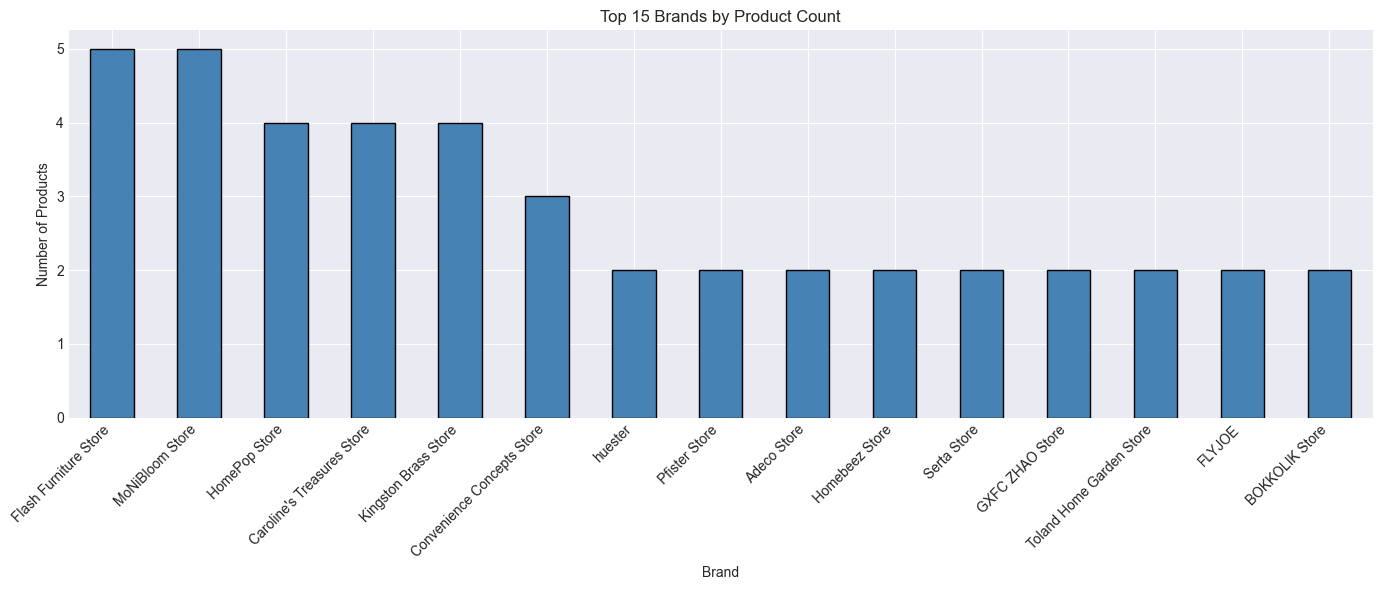

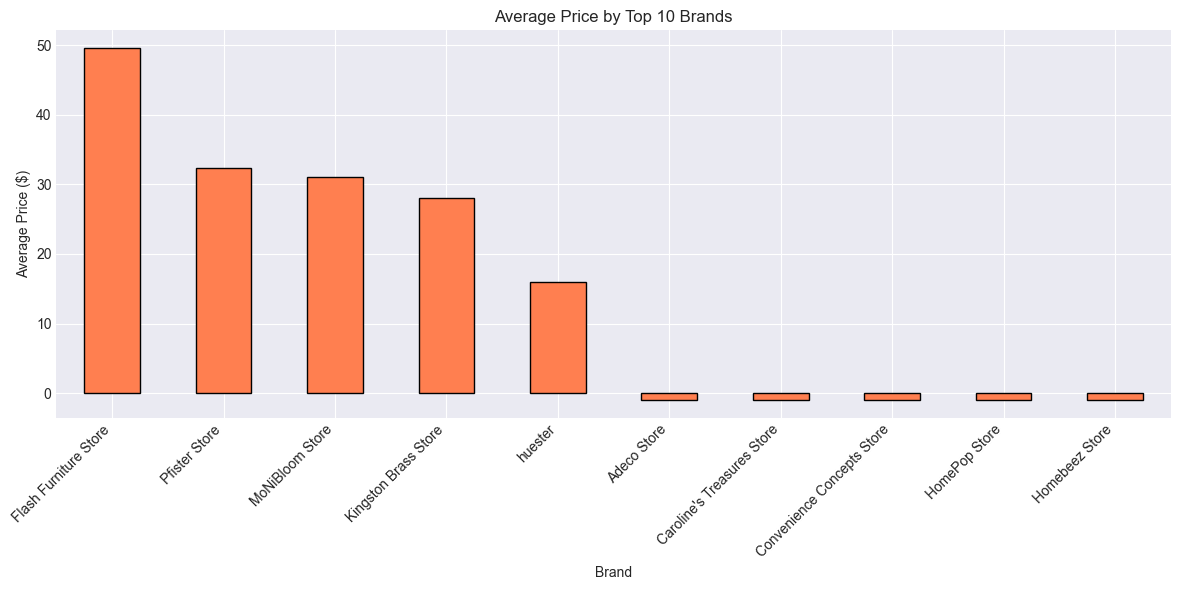

In [6]:
print("🏷️ Brand Analysis:")
print("="*60)

brand_counts = df['brand'].value_counts()
print(f"Total unique brands: {len(brand_counts)}")
print(f"\nTop 15 Brands by Product Count:")
print(brand_counts.head(15))

# Visualize
plt.figure(figsize=(14, 6))
brand_counts.head(15).plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 15 Brands by Product Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average price by top brands
top_brands = brand_counts.head(10).index
brand_avg_price = df[df['brand'].isin(top_brands)].groupby('brand')['price_numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_avg_price.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Top 10 Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


🪵 Material Analysis:
Total unique materials: 72

Top 10 Materials:
material
Wood               31
Engineered Wood    25
Metal              14
Rubber             14
Foam               12
Brass               7
Iron                7
Plastic             5
Stainless Steel     5
Bamboo              5
Name: count, dtype: int64


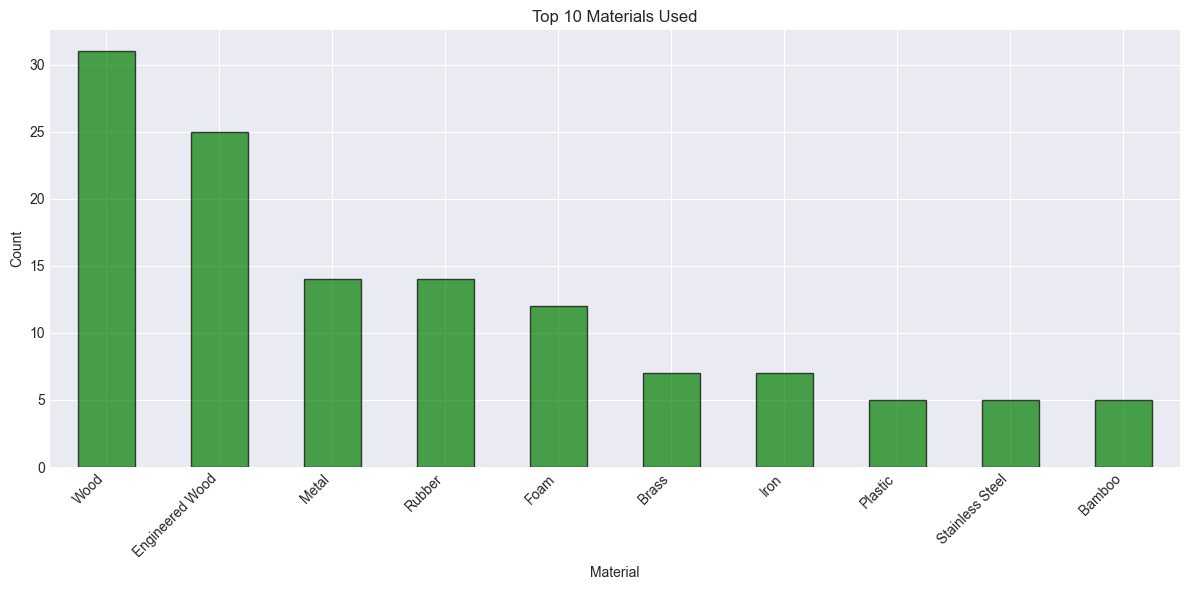

In [7]:
print("🪵 Material Analysis:")
print("="*60)

material_counts = df['material'].value_counts()
print(f"Total unique materials: {len(material_counts)}")
print(f"\nTop 10 Materials:")
print(material_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
material_counts.head(10).plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Top 10 Materials Used')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


🎨 Color Analysis:
Total unique colors: 143

Top 10 Colors:
color
Black           44
Grey            13
White           12
Brown           10
Blue             6
Green            4
Red              4
Rustic Brown     4
Silver           4
Beige            4
Name: count, dtype: int64


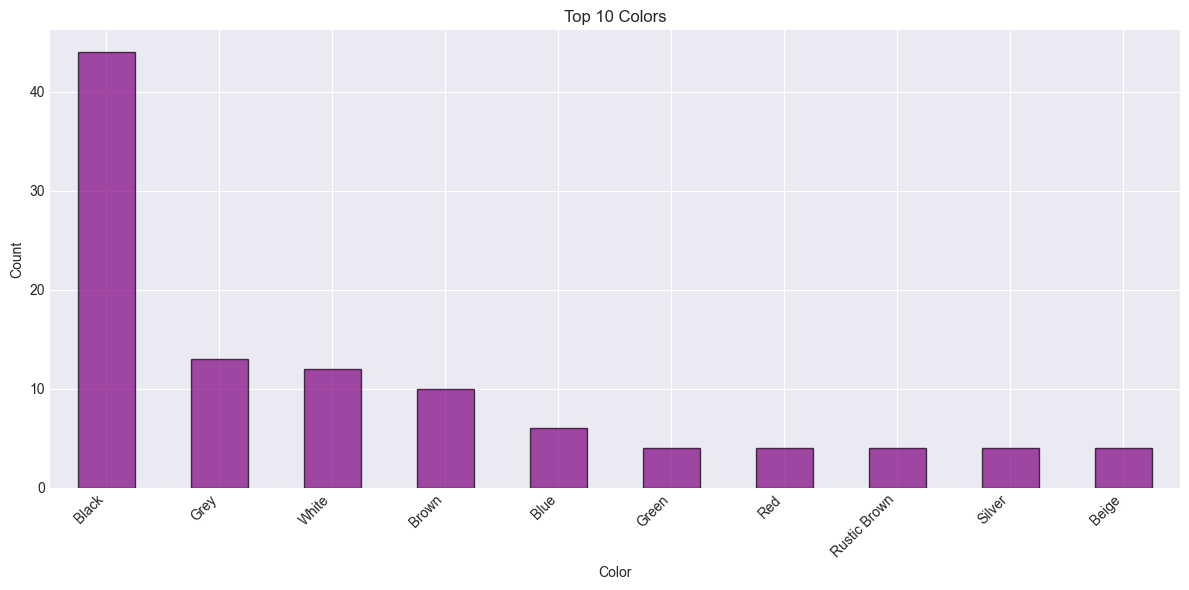

In [8]:
print("🎨 Color Analysis:")
print("="*60)

color_counts = df['color'].value_counts()
print(f"Total unique colors: {len(color_counts)}")
print(f"\nTop 10 Colors:")
print(color_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
color_counts.head(10).plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Top 10 Colors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


📂 Category Analysis:
Total unique categories: 87

Top 10 Categories:
categories
['Home & Kitchen', 'Home Décor Products', 'Mirrors', 'Wall-Mounted Mirrors']                                 21
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Tables', 'End Tables']                             21
['Patio, Lawn & Garden', 'Outdoor Décor', 'Doormats']                                                        20
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Ottomans']                                         20
['Home & Kitchen', 'Furniture', 'Game & Recreation Room Furniture', 'Home Bar Furniture', 'Barstools']       18
['Tools & Home Improvement', 'Hardware', 'Bathroom Hardware', 'Towel Bars']                                  11
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Chairs']                                           10
['Home & Kitchen', 'Furniture', 'Home Office Furniture', 'Home Office Chairs', 'Home Office Desk Chairs']    10
['Home & Kitchen', 'Furn

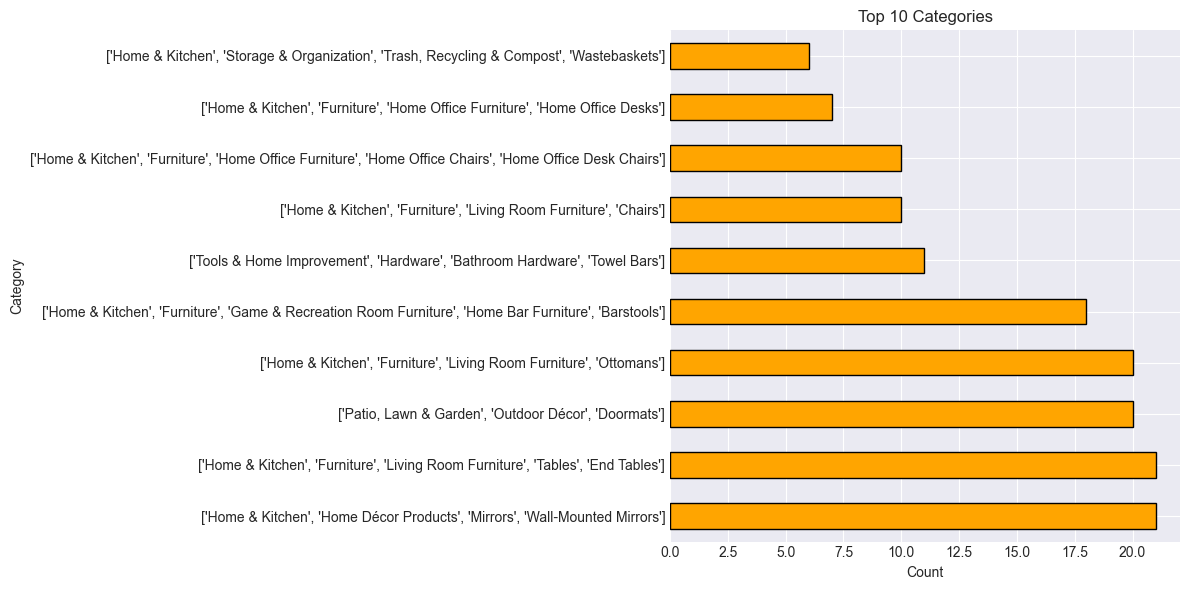

In [9]:
if 'categories' in df.columns:
    print("📂 Category Analysis:")
    print("="*60)
    
    cat_counts = df['categories'].value_counts()
    print(f"Total unique categories: {len(cat_counts)}")
    print(f"\nTop 10 Categories:")
    print(cat_counts.head(10))
    
    plt.figure(figsize=(12, 6))
    cat_counts.head(10).plot(kind='barh', color='orange', edgecolor='black')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.title('Top 10 Categories')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No 'categories' column found in dataset")


In [10]:
print("🔗 Correlation Analysis:")
print("="*60)

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis")


🔗 Correlation Analysis:
Not enough numeric columns for correlation analysis


In [11]:
print("📊 KEY INSIGHTS SUMMARY")
print("="*80)

print(f"""
1. DATASET OVERVIEW:
   - Total Products: {len(df)}
   - Total Brands: {df['brand'].nunique()}
   - Total Materials: {df['material'].nunique()}
   - Total Colors: {df['color'].nunique()}

2. PRICE INSIGHTS:
   - Products with pricing: {len(df[df['price_numeric'] > 0])}
   - Average Price: ${df[df['price_numeric'] > 0]['price_numeric'].mean():.2f}
   - Price Range: ${df[df['price_numeric'] > 0]['price_numeric'].min():.2f} - ${df[df['price_numeric'] > 0]['price_numeric'].max():.2f}

3. TOP BRAND:
   - {df['brand'].value_counts().index[0]} ({df['brand'].value_counts().values[0]} products)

4. MOST COMMON MATERIAL:
   - {df['material'].value_counts().index[0]} ({df['material'].value_counts().values[0]} products)

5. MOST POPULAR COLOR:
   - {df['color'].value_counts().index[0]} ({df['color'].value_counts().values[0]} products)
""")

print("="*80)
print("✅ Data Analytics Complete!")


📊 KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Total Products: 305
   - Total Brands: 264
   - Total Materials: 72
   - Total Colors: 143

2. PRICE INSIGHTS:
   - Products with pricing: 210
   - Average Price: $68.29
   - Price Range: $0.60 - $349.00

3. TOP BRAND:
   - Flash Furniture Store (5 products)

4. MOST COMMON MATERIAL:
   - Wood (31 products)

5. MOST POPULAR COLOR:
   - Black (44 products)

✅ Data Analytics Complete!
